In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:

data = pd.read_csv('heart_disease.txt', delimiter=',')
print("Head of the Data:")
print(data.head())

data.to_csv('output_file.csv', index=False)

Head of the Data:
   63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0  


In [7]:
# Data Preprocessing
data.replace('?', pd.NA, inplace=True)
data = data.apply(pd.to_numeric)
data.fillna(data.mean(), inplace=True)


In [8]:
# Feature Scaling
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [9]:
# Label Management
labeled_ratio = 0.5
y_masked = np.copy(y)
num_labeled = int(labeled_ratio * len(y))

labeled_indices = np.random.choice(len(y), num_labeled, replace=False)
y_masked[:] = -1
y_masked[labeled_indices] = y[labeled_indices]


In [22]:
# Split the data into train & test
def split_data(X_scaled, y_masked, test_size=0.2, random_state=42):
    X_train, X_test, y_train_masked, y_test = train_test_split(X_scaled, y_masked, test_size=test_size, random_state=random_state)
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train_masked: {y_train_masked.shape}")
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_test: {y_test.shape}")
    return X_train, X_test, y_train_masked, y_test

X_train, X_test, y_train_masked, y_test = split_data(X_scaled, y_masked)


Shape of X_train: (241, 13)
Shape of y_train_masked: (241,)
Shape of X_test: (61, 13)
Shape of y_test: (61,)


In [19]:
# 1-Function to train Label Spreading
# 2-Function to train Label Propagation
# 3-Function to train SVM


def train_label_spreading(X_train, y_train_masked):
    model = LabelSpreading(kernel='knn', alpha=0.2)
    model.fit(X_train, y_train_masked)
    return model


def train_label_propagation(X_train, y_train_masked):
    model = LabelPropagation(kernel='knn')
    model.fit(X_train, y_train_masked)
    return model


def train_svm(X_train, y_train_masked):
    labeled_train_indices = np.where(y_train_masked != -1)[0]
    labeled_X_train = X_train[labeled_train_indices]
    labeled_y_train = y_train_masked[labeled_train_indices]
    model = SVC(kernel='linear')
    model.fit(labeled_X_train, labeled_y_train)
    return model

# Train models
label_spread_model = train_label_spreading(X_train, y_train_masked)
label_prop_model = train_label_propagation(X_train, y_train_masked)
svm_model = train_svm(X_train, y_train_masked)


In [20]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    return y_pred


y_pred_spread = evaluate_model(label_spread_model, X_test, y_test)
y_pred_prop = evaluate_model(label_prop_model, X_test, y_test)
y_pred_svm = evaluate_model(svm_model, X_test, y_test)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        25
           0       0.40      0.94      0.57        18
           1       0.00      0.00      0.00         7
           2       0.25      0.20      0.22         5
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         2

    accuracy                           0.33        61
   macro avg       0.16      0.27      0.19        61
weighted avg       0.16      0.33      0.21        61

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        25
           0       0.40      0.94      0.57        18
           1       0.17      0.14      0.15         7
           2       0.20      0.20      0.20         5
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         2

    accuracy                           0.33        61
   macro avg       0.16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

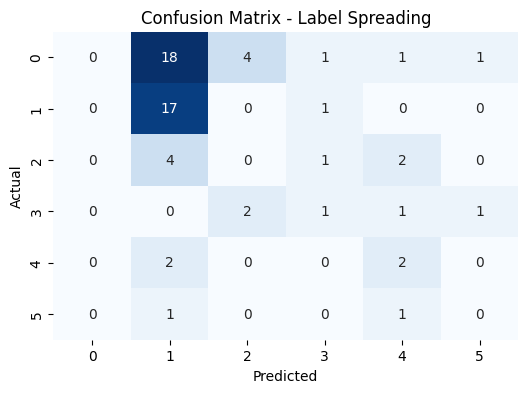

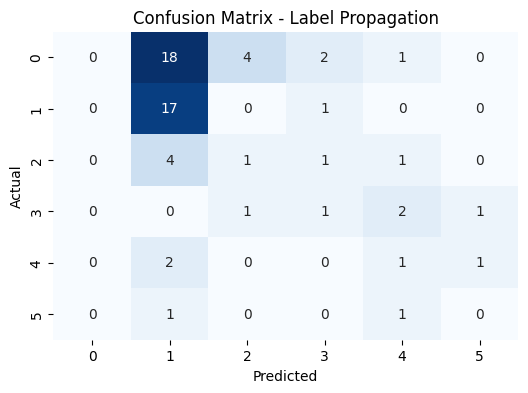

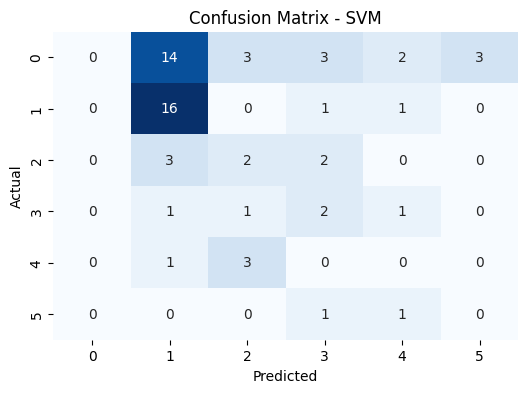

In [21]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_spread, 'Confusion Matrix - Label Spreading')
plot_confusion_matrix(y_test, y_pred_prop, 'Confusion Matrix - Label Propagation')
plot_confusion_matrix(y_test, y_pred_svm, 'Confusion Matrix - SVM')
